# Gender Classification with CNN

The goal of this project is to develop a gender classification system using Convolutional Neural Networks (CNN). The system will take an input image containing a person's face and predict the gender of that person as male or female.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [3]:
dataframe = pd.read_csv('gender_classification_v7.csv')

# Exploratory Data Analysis

The process of analyzing and understanding a dataset to gain insights and identify patterns or trends. The goal of exploring the data is to become familiar with its structure, distribution, and quality, as well as to identify potential issues or anomalies that may need to be addressed before further analysis.

In [4]:
dataframe.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
dataframe.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [6]:
dataframe['gender'] = dataframe['gender'].map({'Female':0, 'Male':1})

In [7]:
dataframe.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [8]:
dataframe['gender'].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

In [9]:
dataframe.shape

(5001, 8)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [11]:
dataframe.isna().sum().any()

False

In [12]:
dataframe.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

<AxesSubplot:title={'center':'Gender'}>

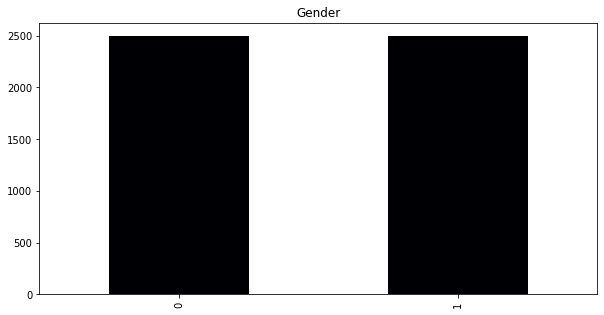

In [14]:
dataframe['gender'].value_counts().plot(kind = 'bar',
                                         figsize = (10, 5), 
                                         title = 'Gender', 
                                         rot = 90, 
                                         cmap = 'magma')

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data

In [15]:
dataframe.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [16]:
corr_matrix = dataframe.corr()

In [17]:
corr_matrix

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


<AxesSubplot:>

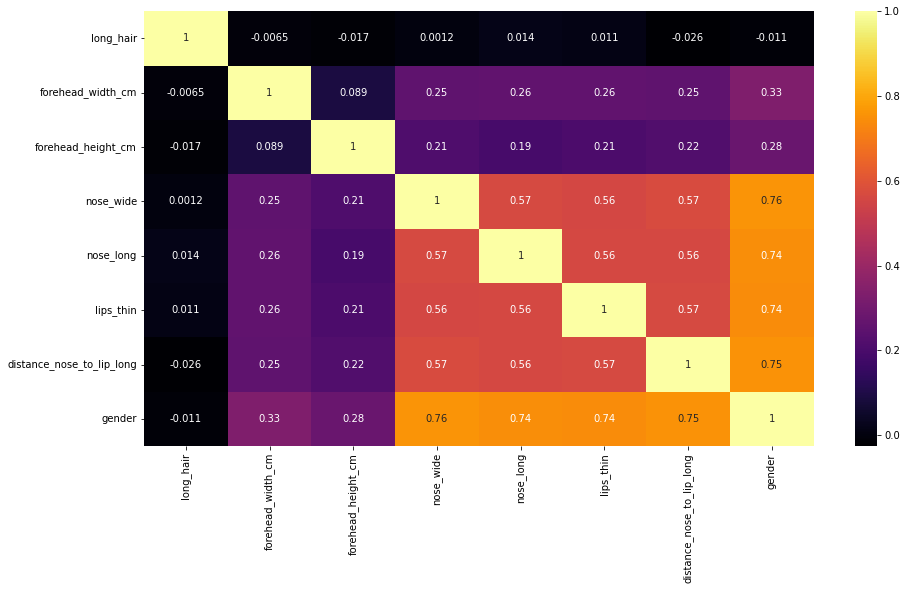

In [18]:
plt.figure(figsize = (15, 8))
sns.heatmap(corr_matrix,
            annot = True, 
            cmap = 'inferno')

In [19]:
dataset = dataframe.drop('gender', axis = 1)

In [20]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


<AxesSubplot:title={'center':'Correlation with Gender'}>

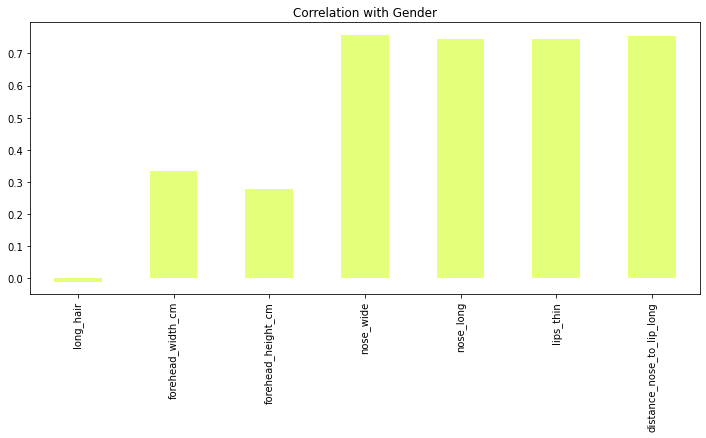

In [21]:
dataset.corrwith(dataframe['gender']).plot.bar(
    figsize = (12, 5), 
    title = 'Correlation with Gender', 
    cmap = 'Wistia', 
    rot =90
)

In [22]:
dataframe.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [23]:
dataframe.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [24]:
from pandas_profiling import ProfileReport

In [26]:
profile_report = ProfileReport(dataframe, minimal = True)
profile_report.to_file('Gender_Profile_Report.html')
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
dataframe.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [27]:
x = dataframe.drop('gender', axis = 1)
y = dataframe['gender']

In [28]:
x.shape, y.shape

((5001, 7), (5001,))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
x_train

array([[ 0.38740968, -0.16648337,  0.84755776, ...,  0.98412598,
         1.01714699,  0.99850112],
       [ 0.38740968, -1.06993404,  0.29211605, ...,  0.98412598,
         1.01714699,  0.99850112],
       [ 0.38740968, -0.8892439 , -1.0039146 , ..., -1.01613007,
        -0.98314207, -1.00150113],
       ...,
       [ 0.38740968, -1.4313143 , -0.26332566, ...,  0.98412598,
         1.01714699,  0.99850112],
       [ 0.38740968,  0.01420676, -0.26332566, ...,  0.98412598,
        -0.98314207, -1.00150113],
       [ 0.38740968, -1.34096924,  0.47726329, ..., -1.01613007,
        -0.98314207, -1.00150113]])

In [36]:
x_test

array([[ 0.38740968, -0.70855377, -0.63362013, ..., -1.01613007,
        -0.98314207, -1.00150113],
       [ 0.38740968, -0.79889884,  0.66241052, ..., -1.01613007,
         1.01714699, -1.00150113],
       [ 0.38740968, -1.1602791 , -1.0039146 , ..., -1.01613007,
        -0.98314207, -1.00150113],
       ...,
       [ 0.38740968, -1.52165937, -0.07817842, ...,  0.98412598,
         1.01714699,  0.99850112],
       [ 0.38740968,  0.19489689,  1.21785223, ...,  0.98412598,
         1.01714699,  0.99850112],
       [ 0.38740968,  0.10455183, -1.18906184, ...,  0.98412598,
         1.01714699,  0.99850112]])

In [37]:
x_train.shape, x_test.shape

((4000, 7), (1001, 7))

# Reshaping

Reshaping a tensor involves rearranging its elements into a new shape without changing their values. The reshaping operation can be applied to tensors of different dimensions, such as converting a 1D tensor into a 2D tensor or vice versa. Reshaping is commonly performed using the reshape() function or method available in most deep learning frameworks.

In [38]:
x_train = x_train.reshape(4000, 7, 1)
x_test = x_test.reshape(1001, 7, 1)

In [39]:
x_train.shape, x_test.shape

((4000, 7, 1), (1001, 7, 1))

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [48]:
model = Sequential()
model.add(Conv1D(32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (7, 1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.))

model.add(Conv1D(64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 32)             96        
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 3, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 3, 32)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 3, 64)             4160      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)           

Early stopping is a technique used during the training of machine learning models to prevent overfitting and find the optimal point at which to stop training. It involves monitoring the performance of the model on a validation dataset and stopping the training process when the model's performance on the validation dataset starts to degrade.

In [78]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           patience = 3, 
                           restore_best_weights = True)

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [51]:
model.compile(optimizer = Adam(0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance.

In [52]:
model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), 
          epochs = 250, 
          callbacks = [early_stop])

Epoch 1/250
125/125 [==============================] - 8s 18ms/step - loss: 0.6698 - accuracy: 0.6693 - val_loss: 0.5388 - val_accuracy: 0.9461
Epoch 2/250
125/125 [==============================] - 1s 10ms/step - loss: 0.3332 - accuracy: 0.8510 - val_loss: 0.2885 - val_accuracy: 0.9680
Epoch 3/250
125/125 [==============================] - 1s 10ms/step - loss: 0.2170 - accuracy: 0.9150 - val_loss: 0.1421 - val_accuracy: 0.9670
Epoch 4/250
125/125 [==============================] - 1s 11ms/step - loss: 0.1809 - accuracy: 0.9320 - val_loss: 0.0936 - val_accuracy: 0.9690
Epoch 5/250
125/125 [==============================] - 1s 11ms/step - loss: 0.1634 - accuracy: 0.9442 - val_loss: 0.0790 - val_accuracy: 0.9730
Epoch 6/250
125/125 [==============================] - 1s 11ms/step - loss: 0.1495 - accuracy: 0.9513 - val_loss: 0.0733 - val_accuracy: 0.9720
Epoch 7/250
125/125 [==============================] - 2s 13ms/step - loss: 0.1348 - accuracy: 0.9548 - val_loss: 0.0695 - val_accuracy:

In [53]:
model.save('model_gender_classification.h5')

# Learning Curve

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [54]:
loss = pd.DataFrame(model.history.history)

In [55]:
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.669825,0.66925,0.538836,0.946054
1,0.333196,0.85100,0.288492,0.968032
2,0.216962,0.91500,0.142104,0.967033
3,0.180929,0.93200,0.093561,0.969031
4,0.163399,0.94425,0.079017,0.973027


<AxesSubplot:>

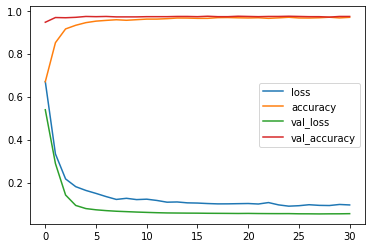

In [56]:
loss.plot()

<AxesSubplot:>

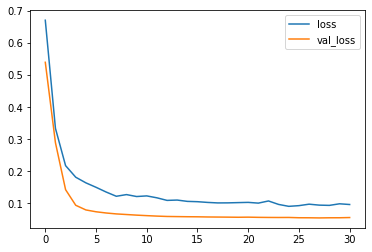

In [57]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

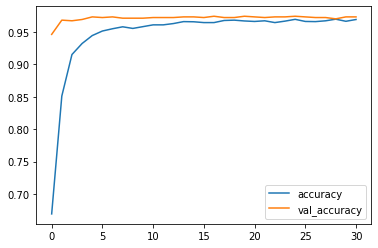

In [59]:
loss[['accuracy', 'val_accuracy']].plot()

# Prediction :

In [60]:
y_pred = model.predict(x_test)
predict_class = y_pred.argmax(axis = 1)

32/32 [==============================] - 1s 5ms/step


In [63]:
print(y_test.iloc[2]), print(predict_class[2])

0
0


(None, None)

In [66]:
print(y_test.iloc[4]), print(y_pred[45])

1
[0.9997515]


(None, None)

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement

In [67]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix = confusion_matrix(y_test, predict_class)

In [72]:
confusion_matrix

array([[505,   0],
       [496,   0]], dtype=int64)

<AxesSubplot:>

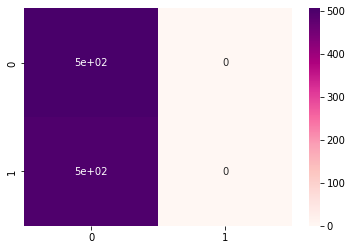

In [73]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'RdPu')